In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/penerbangan/Jan_2019_ontime.csv


In [2]:
#LOAD AND PREVIEW DATA
filename = '/kaggle/input/penerbangan/Jan_2019_ontime.csv'

df = pd.read_csv(filename)

In [3]:
df.shape #bentuk/dimensi dataset (baris,kolom)

(583985, 19)

In [4]:
df.columns #daftar nama kolom

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE'],
      dtype='object')

In [5]:
df.info() #informasi dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN                 583985 non-null  object 
 9   DEST_AIRPORT_ID        583985 non-null  int64  
 10  DEST                   583985 non-null  object 
 11  DEP_TIME               567633 non-null  float64
 12  DEP_DEL15              567630 non-null  float64
 13  DEP_TIME_BLK           583985 non-null  object 
 14  ARR_TIME               566924 non-nu

In [6]:
df.isnull().sum() #mendeteksi nilai kosong

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [7]:
df.isnull().values.sum() #menghitung jumlah seluruh nilai kosong

70333

In [8]:
column = ['OP_UNIQUE_CARRIER', 'DAY_OF_MONTH', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'DEST', 'ORIGIN', 'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'DIVERTED', 'DISTANCE' ]

df = df.drop(columns = column) #menghapus kolom yang dipilih
df.head()

,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CANCELLED
0,2,20363,11953,10397,0
1,2,20363,13487,11193,0
2,2,20363,11433,11193,0
3,2,20363,15249,10397,0
4,2,20363,10397,11778,0


In [9]:
array = df.values #membuat array
X = array [:, 0:4]
Y = array [:, 4]
array

array([[    2, 20363, 11953, 10397,     0],
       [    2, 20363, 13487, 11193,     0],
       [    2, 20363, 11433, 11193,     0],
       ...,
       [    4, 19977, 14955, 12016,     0],
       [    4, 19977, 14955, 12016,     0],
       [    4, 19977, 12016, 14955,     0]])

In [10]:
#mengubah data kategorikal menjadi numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])
X[:, 1] = le.fit_transform(X[:, 1])

In [11]:
from sklearn.model_selection import train_test_split #library untuk membagi dataset menjadi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0) #test size adalah data yang di test 0.2 (20%)
x_test

array([[    3,     2, 10397, 11057],
       [    3,    14, 15304, 14122],
       [    5,     4, 14771, 11618],
       ...,
       [    5,     5, 13495, 12266],
       [    1,     0, 11259, 14107],
       [    1,     3, 11298, 13891]])

In [12]:
from sklearn.naive_bayes import GaussianNB #import gaussian naive bayes model
GNB = GaussianNB() 
GNB.fit(x_train, y_train) #memasukkan data training pada fungsi klasifikasi naive bayes

GaussianNB()

In [21]:
#Predictthe result data tes
y_pred = GNB.predict(x_test)

print(y_pred)

[0 0 0 ... 0 0 0]


In [22]:
#Cek nilai akurasi
from sklearn.metrics import confusion_matrix,accuracy_score

0.9714461844054214

In [23]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[113462      0]
 [  3335      0]]

True Positives(TP) =  113462

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  3335


<AxesSubplot:>

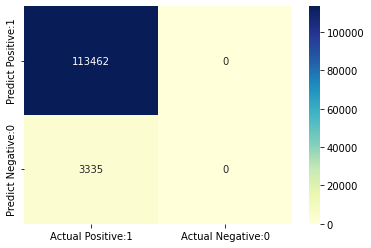

In [24]:
#Classification matrix
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [25]:
ac = accuracy_score(y_test, y_pred)
ac

0.9714461844054214